#Exploratory Data analytics and Predictive Modeling of IntelliMed Heathcare
## Series of steps to be covered are as follows
## Step 1: Data Exploration
## Step 2: Data cleaning & Feature engineering
## Step 3: Predictive Modelling using Logistic Regression
## Step 4: Predictive Modelling - Ensemble Methods
## Step 5: Model Comparison




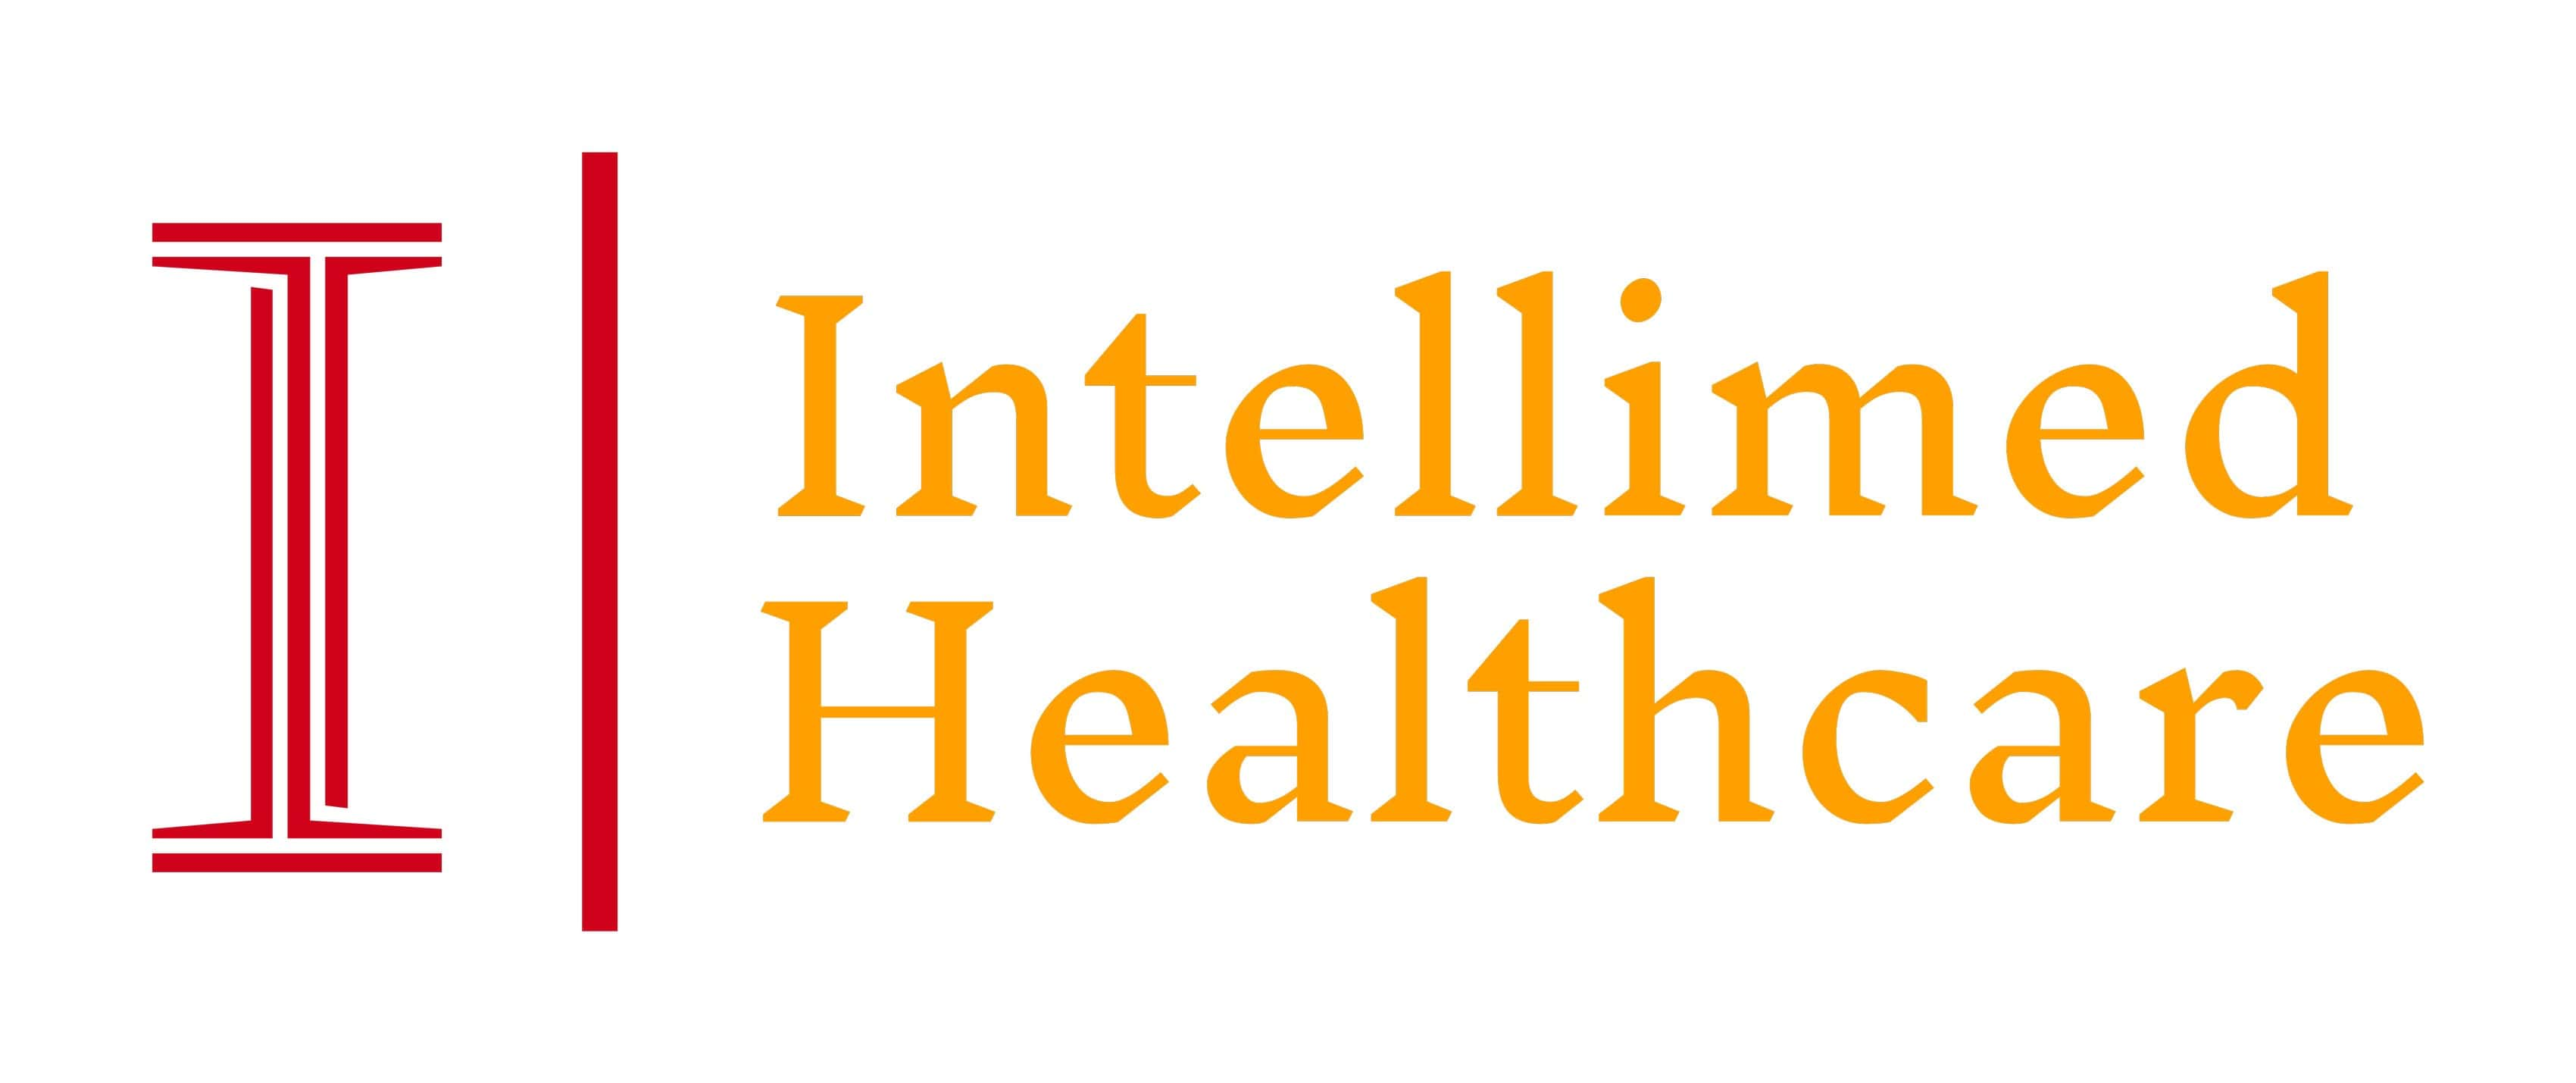

## Import the Data


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the Data
path1 = "train_dataset.csv"
path2 = "/content/drive/Shareddrives/UNIVERSITY/PR1 - AI and Hyperautomation/Capstone Project (PR1)/data/train_dataset.csv"

if os.path.exists(path1):
    df = pd.read_csv(path1)
else:
    df = pd.read_csv(path2)

# Step 1: Data Exploration

In [ ]:
df.head()

Id  Age Gender ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  PT1000   42      M           ATA        120          198          0   
1  PT1001   54      M           ASY        140          239          0   
2  PT1002   60      M           NAP        141          316          1   
3  PT1003   54      M           ASY        124          266          0   
4  PT1004   55      M           ATA        160          292          1   

  RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0     Normal    155              N      0.0       Up             0  
1     Normal    160              N      1.2       Up             0  
2         ST    122              Y      1.7     Flat             1  
3        LVH    109              Y      2.2     Flat             1  
4     Normal    143              Y      2.0     Flat             1

In [ ]:
#Check dimensionality
df.shape

(734, 13)



*   734 observations
*   13 variables



In [ ]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              734 non-null    object 
 1   Age             734 non-null    int64  
 2   Gender          734 non-null    object 
 3   ChestPainType   734 non-null    object 
 4   RestingBP       734 non-null    int64  
 5   Cholesterol     734 non-null    int64  
 6   FastingBS       734 non-null    int64  
 7   RestingECG      734 non-null    object 
 8   MaxHR           734 non-null    int64  
 9   ExerciseAngina  734 non-null    object 
 10  Oldpeak         734 non-null    float64
 11  ST_Slope        734 non-null    object 
 12  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 74.7+ KB


In [ ]:
#Checking missing values
df.isnull().sum()

Id                0
Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

there are no missing values in dataset


In [ ]:
#check for duplicates
df.duplicated().sum()

0

##Exploring variables

In [ ]:
#Let's write a function to  create a bar chart to view all the variables affecting amd causing heart disease
# heart disease based on different variables

import pandas as pd
import matplotlib.pyplot as plt

def bar_chart(dataframe, feature):
    hd_true = dataframe[dataframe['HeartDisease'] == 1][feature].value_counts()
    hd_false = dataframe[dataframe['HeartDisease'] == 0][feature].value_counts()
    df = pd.DataFrame([hd_true, hd_false])
    df.index = ['hd_true', 'hd_false']
    ax= df.plot(kind='bar', stacked=True, figsize=(10, 5))
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_title(f'Stacked Bar Chart of {feature} vs. Heart Disease')
    plt.show()
    return df


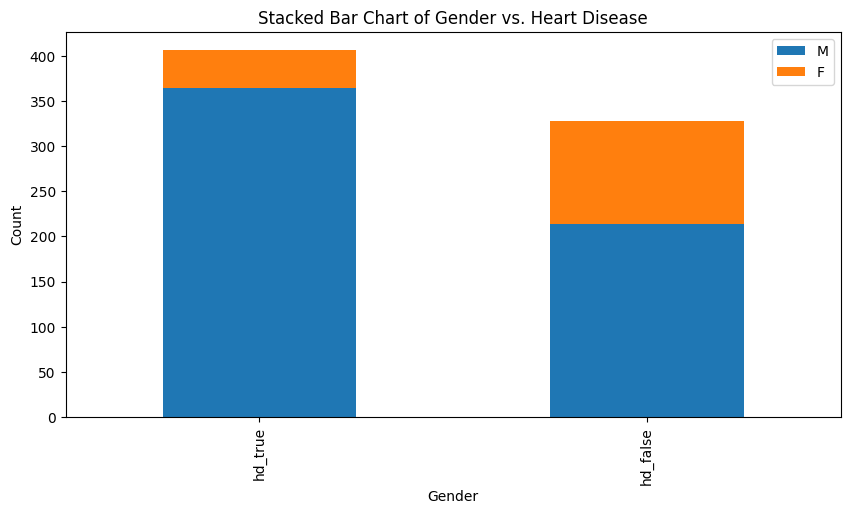

M    F
hd_true   364   42
hd_false  214  114

In [ ]:
bar_chart(df, 'Gender')


* hd_true means person getting heart disease
* hd_false means person NOT getting heart disease.
 From the above chart, males has higher incidence of heart disease as
compared to females.

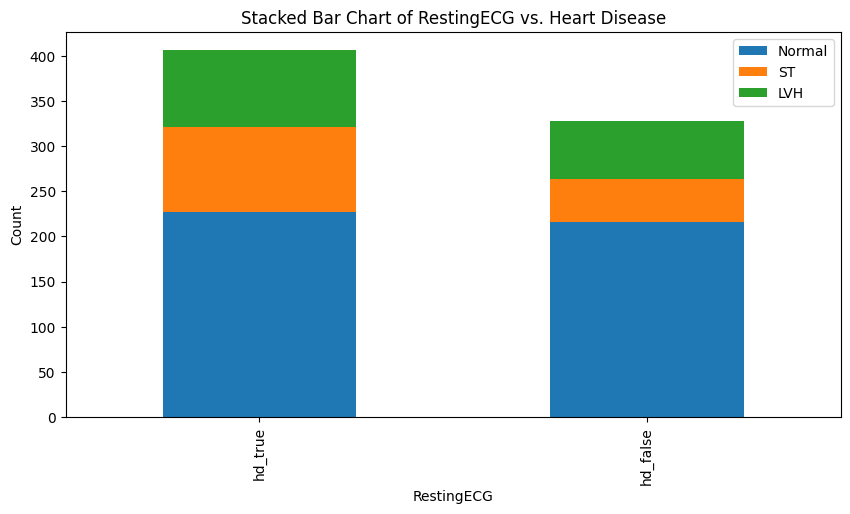

Normal  ST  LVH
hd_true      227  94   85
hd_false     216  47   65

In [ ]:
bar_chart(df, 'RestingECG')

Talking about resting ECG,it interprets that ST is the primary cause of heart disease followed by LVH.

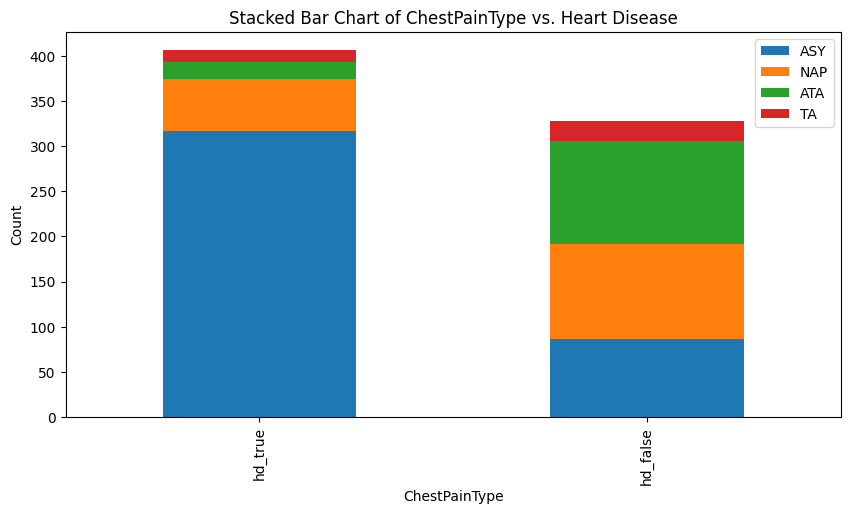

ASY  NAP  ATA  TA
hd_true   317   57   19  13
hd_false   86  105  115  22

In [ ]:
bar_chart(df,'ChestPainType')

The above chart interprets that the type of chest pain which is the cause of heart disease in most people is **Asymptoamtic** followed by **Non-Anginal Pain**

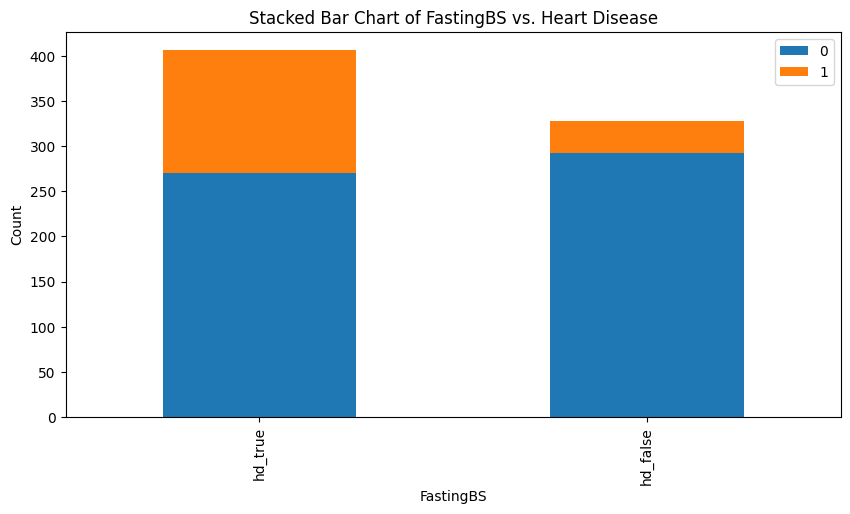

0    1
hd_true   270  136
hd_false  292   36

In [ ]:
bar_chart(df,'FastingBS')

This chart conveys that total of 136 people have high FastingBS and might be at degree of risk of heart disease.



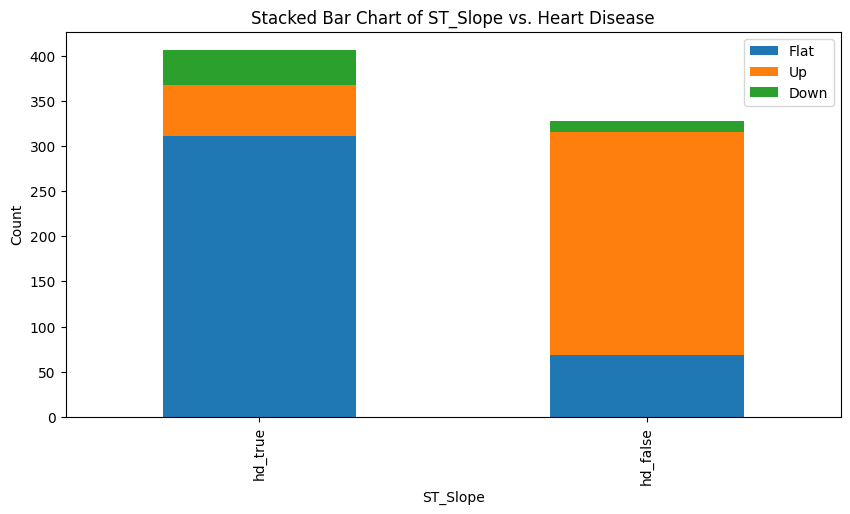

Flat   Up  Down
hd_true    311   56    39
hd_false    68  247    13

In [ ]:
bar_chart(df,'ST_Slope')

##Checking for outliers

<Axes: >

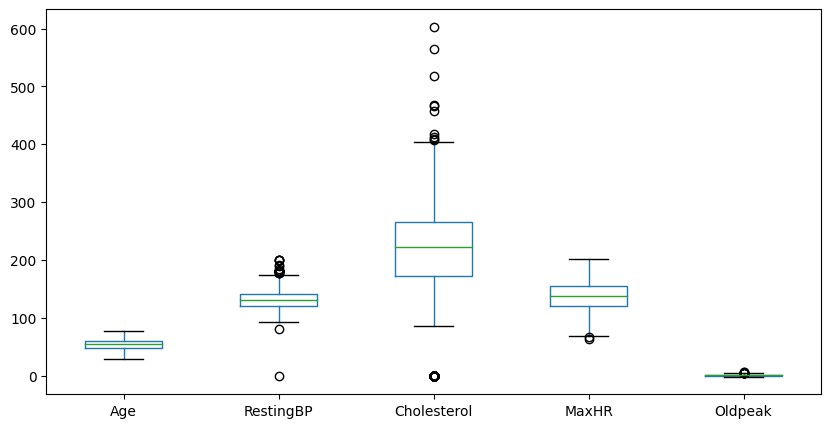

In [ ]:
# Boxplot of all numerical input variables
df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].boxplot(figsize=(10,5), grid=False)


Variables that have outliers are:


*   Resting BP
*   Cholesterol
*   MaxHR Old peak

Fasting BS is binary.

##Exploring the target variable


*   Check for distribution
*   Check for class imbalance
*   Examine relationship with other variables

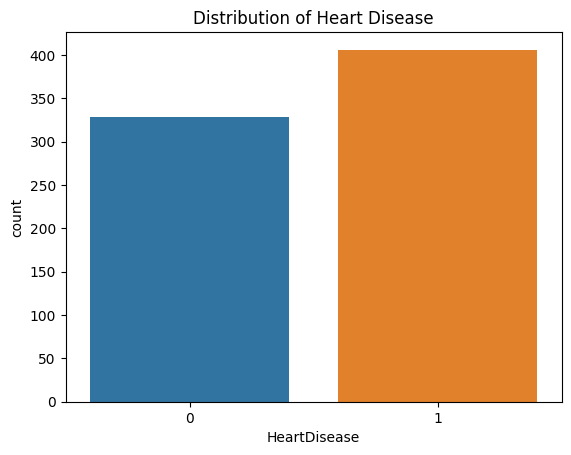

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot of the HeartDisease variable
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.show()


In [ ]:
 #Check for class imbalance
print(df['HeartDisease'].value_counts())


1    406
0    328
Name: HeartDisease, dtype: int64


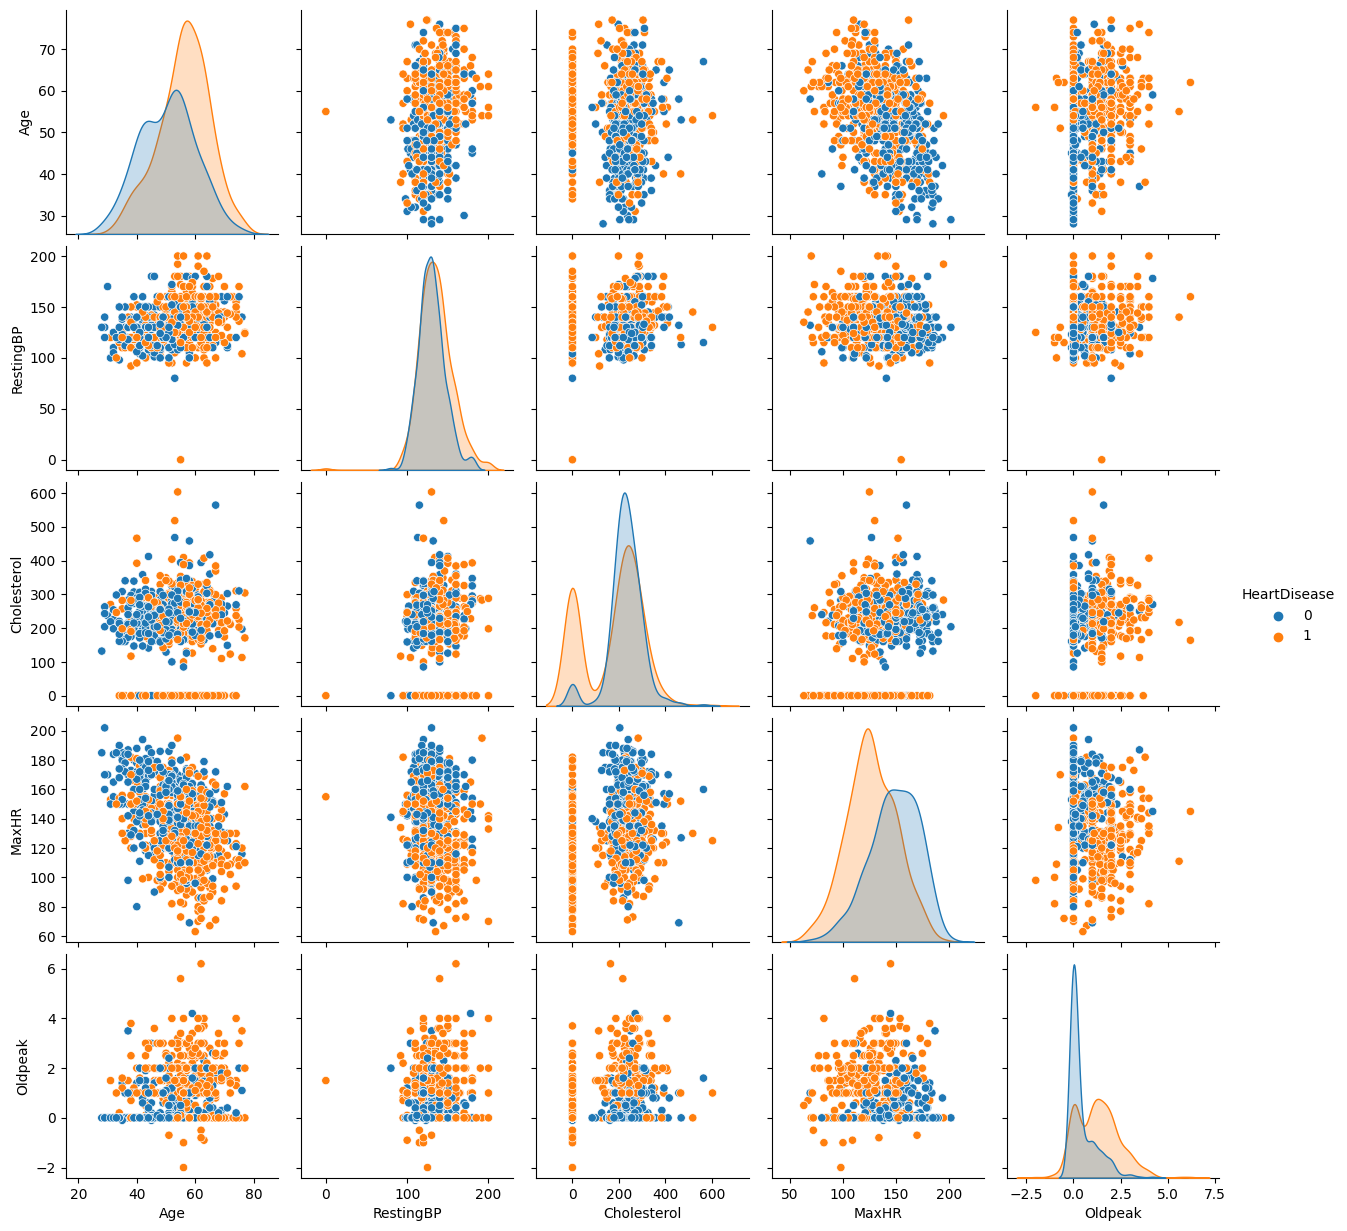

In [ ]:
# Examine relationships with other variables
sns.pairplot(df, hue='HeartDisease', vars=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])
plt.show()


#Step 2: Data pre-processing


In [ ]:
data = df

### Dealing with outliers

<Axes: >

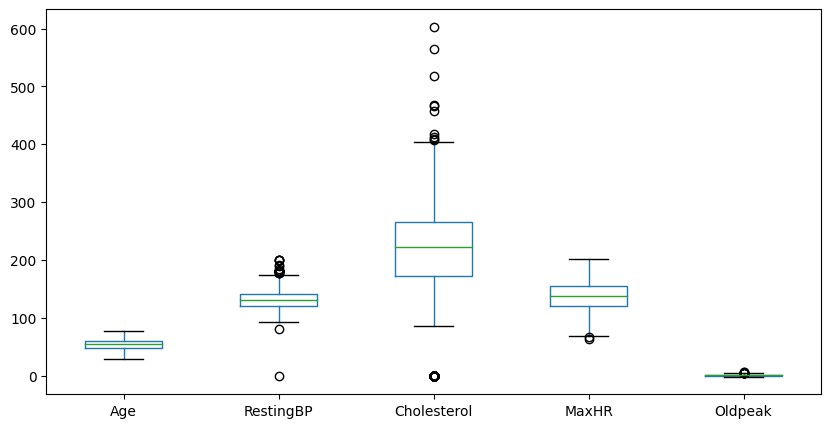

In [ ]:
# Boxplot of all numerical input variables
data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].boxplot(figsize=(10,5), grid=False)


Variables that have outliers are:
* RestingBP
* Cholesterol
* MaxHR
* Old peak

Are they likely to be errors in data entry?

array([[<Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>]], dtype=object)

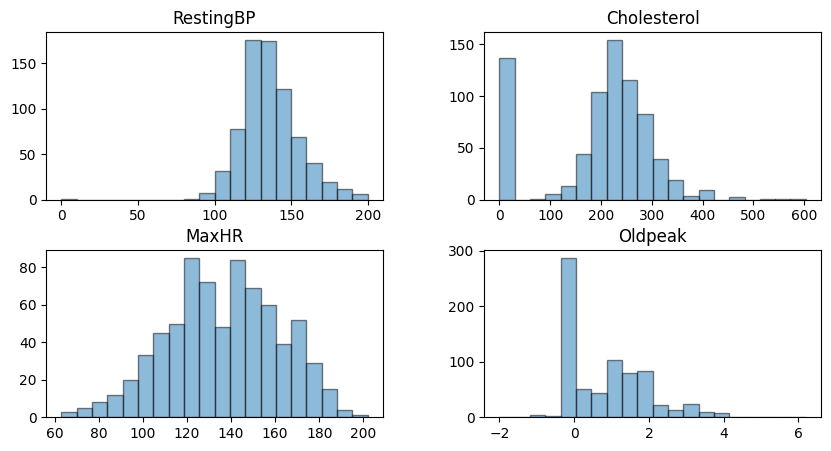

In [ ]:
data[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].hist(figsize=(10,5), bins=20, grid=False, edgecolor='black', alpha=0.5)

The histogram shows that there are a small amount of near to zero BP outliers, and a large amount of near to zero Cholesterol outliers. These are likely to be data entry errors as readings so low are not plausible.

In [ ]:
# Summary statistics of variables with outliers
data[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].describe().round(2)

RestingBP  Cholesterol   MaxHR  Oldpeak
count     734.00       734.00  734.00   734.00
mean      132.96       198.34  136.43     0.90
std        18.82       109.26   25.73     1.05
min         0.00         0.00   63.00    -2.00
25%       120.00       172.00  120.00     0.00
50%       130.00       222.50  138.00     0.60
75%       141.75       265.00  155.00     1.50
max       200.00       603.00  202.00     6.20

#### Functions for detecting outliers

In [ ]:
def detect_outliers(data, column_name):
    """
    Detects outliers in a given column of a pandas DataFrame using the IQR method.

    Parameters:
    data (pandas.DataFrame): DataFrame containing the data.
    column_name (str): Name of the column to detect outliers for.

    Returns:
    A tuple containing the lower and upper limits for outliers in the given column.
    """

    # Calculate the first and third quartiles for the given column
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Calculate the lower and upper limits for outliers
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Return the lower and upper limits as a tuple
    return (lower_limit, upper_limit)

In [ ]:
def get_outliers(data, column_name, lower_limit, upper_limit):
    """
    Returns a filtered DataFrame containing the records that fall outside the
    lower and upper limits for a given column.

    Parameters:
    data (pandas.DataFrame): DataFrame containing the data.
    column_name (str): Name of the column to filter outliers for.
    lower_limit (float): Lower limit for outliers.
    upper_limit (float): Upper limit for outliers.

    Returns:
    A filtered DataFrame containing the records that fall outside the
    lower and upper limits for the given column.
    """

    # Filter the DataFrame to include only the records that fall outside
    # the lower and upper limits for the given column
    outliers = data[(data[column_name] < lower_limit) | (data[column_name] > upper_limit)]

    # Return the filtered DataFrame
    return outliers

#### Transforming outliers

In [ ]:
# Create a new df
data1 = data.copy()

##### Cholesterol - Handling Outliers

Histogram shows that Cholesterol has >100 values of near to 0 cholesterol. This is highly likely to be an incorrect reading.

In [ ]:
# How many patients have a cholesterol level of 0?
data1[data1['Cholesterol'] == 0].shape

(137, 13)

In [ ]:
# Impute Cholesterol reading of 0 with the median value
data1['Cholesterol'] = data1['Cholesterol'].replace(0, data1['Cholesterol'].mean())

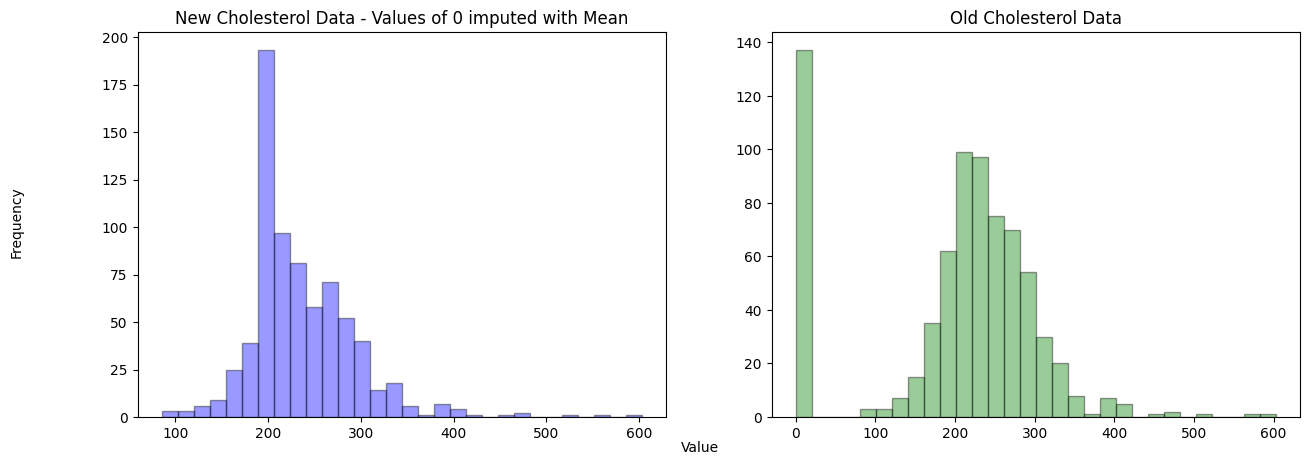

In [ ]:
# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# plot histogram of data1 on the first subplot
axs[0].hist(data1['Cholesterol'], bins=30, color='blue', edgecolor='black', alpha=0.4)
axs[0].set_title('New Cholesterol Data - Values of 0 imputed with Mean')

# plot histogram of data2 on the second subplot
axs[1].hist(data['Cholesterol'], bins=30, color='green', edgecolor='black', alpha=0.4)
axs[1].set_title('Old Cholesterol Data')

# set common x and y labels for the subplots
fig.text(0.5, 0.04, 'Value', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

# display the plot
plt.show()


**Domain information about Cholesterol**

The normal range for cholesterol levels can vary slightly depending on factors such as age, sex, and overall health status. However, the following are generally accepted as the normal ranges for cholesterol levels in milligrams per deciliter (mg/dL):

* Total cholesterol: less than 200 mg/dL
* LDL (low-density lipoprotein) cholesterol: less than 100 mg/dL (or less than 70 mg/dL for individuals at very high risk of heart disease)
* HDL (high-density lipoprotein) cholesterol: 40 mg/dL or higher (60 mg/dL or higher is considered protective against heart disease)
* Triglycerides: less than 150 mg/dL

**Low cholesterol**

* Total cholesterol level below 120 mg/dL (milligrams per deciliter) is generally considered very low
* However, it's important to note that extremely low levels of cholesterol are rare and usually occur only in people with certain genetic conditions or serious underlying health problems.

**High cholesterol**

* While it is rare, it is possible to have a cholesterol reading of 600 or higher. This is known as extremely high cholesterol, or hypercholesterolemia.

**Decision regarding the remaining outliers in Cholesterol**

Having removed the hundred or so records that had a cholesterol reading of 0 which would have been misreadings, we will be leaving the other outliers as they are not likely incorrect, rather represent a pattern in the data.

We may decide to turn this variable into a categorical variable by binning. This may make it more powerful predictor.

##### MaxHR - Outliers

In [ ]:
# Call the detect_outliers function for the MaxHR column
lower_limit, upper_limit = detect_outliers(data1, 'MaxHR')
# Get the records that fall outside the lower and upper limits for MaxHR
maxhr_outliers = get_outliers(data1, 'MaxHR', lower_limit, upper_limit)

# Print the lower and upper limits for MaxHR
print("Lower limit for MaxHR outliers:", lower_limit)
print("Upper limit for MaxHR outliers:", upper_limit, end="\n\n")

# Print records that are less than lower limit
data1[data1['MaxHR'] < lower_limit]


Lower limit for MaxHR outliers: 67.5
Upper limit for MaxHR outliers: 207.5



Id  Age Gender ChestPainType  RestingBP  Cholesterol  FastingBS  \
394  PT1394   65      M           ASY        145   198.339237          1   
665  PT1665   60      M           ASY        135   198.339237          0   

    RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
394         ST     67              N      0.7     Flat             1  
665     Normal     63              Y      0.5       Up             1

Two records that are low outliers MaxHR. While the readings seem a little low for someone with heart disease, it doesn't look like its an incorrect recording, and it's unlikely to adversly affect the analysis.

Therefore, we will leave these records as is.

##### Resting Blood Pressure - Outliers

In [ ]:
# Call the detect_outliers function for the RestingBP column
lower_limit, upper_limit = detect_outliers(data1, 'RestingBP')

# Get the records that fall outside the lower and upper limits for RestingBP
outliers = get_outliers(data, 'RestingBP', lower_limit, upper_limit)

# Print the lower and upper limits for RestingBP
print("Lower limit for RestingBP outliers:", lower_limit)
print("Upper limit for RestingBP outliers:", upper_limit, end="\n\n")

# Print low BP outliers
data1[data1['RestingBP'] < lower_limit]


Lower limit for RestingBP outliers: 87.375
Upper limit for RestingBP outliers: 174.375



Id  Age Gender ChestPainType  RestingBP  Cholesterol  FastingBS  \
217  PT1217   55      M           NAP          0   198.339237          0   
254  PT1254   53      M           ASY         80   198.339237          0   

    RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
217     Normal    155              N      1.5     Flat             1  
254     Normal    141              Y      2.0     Down             0

Records 217 and 254 are low outliers. Record 217 is a reading of 0 which must be incorrect. We will impute this record with the mean.

As patient 254 has a BP reading of 80 no heart disease, it is possible that this is correct. It is also only just outside the lower limit for outliers, so we will leave it.

In [ ]:
# Impute outlier of BP = 0 with the mean
data1['RestingBP'] = data1['RestingBP'].replace(0, data1['RestingBP'].mean())

**High outliers**

In [ ]:
# How many patients have a BP > 180?
print("Shape of high outliers: ", data1[data1['RestingBP'] > upper_limit].shape)

# Max RestingBP
print("Max RestingBP: ", data['RestingBP'].max())

Shape of high outliers:  (21, 13)
Max RestingBP:  200


In [ ]:
# How many people with blood pressure > 174 have heart disease?

# Create a filtered dataframe where RestingBP > 174
filtered_data = data1[data1['RestingBP'] > 174]

# Create a pivot table with count of patients grouped by HeartDisease
pivot_table = pd.pivot_table(filtered_data, index=['HeartDisease'], values=['Id'], aggfunc=np.count_nonzero)

# Rename the column 'Id' to 'Patients'
pivot_table = pivot_table.rename(columns={'Id': 'Patients'})

# Print the pivot table
print(pivot_table)


              Patients
HeartDisease          
0                    6
1                   15


There are 21 patients with systolic blood pressure > than the upper limit (174). Blood pressure > 174 and up to 200 is possible but it is extremely high and considered a medical emergency. As 70% of these patients have heart disease, we can infer that these extremely high BP readings are not errors in data collection and actually represent a pattern in the data.

Therefore, we will leave these high outliers as is.

##### Oldpeak - Outliers

Oldpeak, also known as the ST depression, is a measurement on the ECG that refers to the amount of depression or "downward" shift in the ST segment of the ECG waveform. It is typically measured in millimeters (mm) and is used to evaluate the severity of myocardial ischemia, which is a condition in which the heart muscle does not receive enough oxygen-rich blood.

The normal range for Oldpeak is generally considered to be less than 1 mm in the standard 12-lead ECG.

Resources:
* [S-T Segment](https://litfl.com/st-segment-ecg-library/)



In [ ]:
# Old peak upper and lower outlier limits

# Call the detect_outliers function for the RestingBP column
lower_limit, upper_limit = detect_outliers(data1, 'Oldpeak')

# Get the records that fall outside the lower and upper limits for RestingBP
outliers = get_outliers(data1, 'Oldpeak', lower_limit, upper_limit)

# Print the lower and upper limits for RestingBP
print("Lower limit for Oldpeak outliers:", lower_limit)
print("Upper limit for Oldpeak outliers:", upper_limit, end="\n\n")

# Print min & max for Oldpeak
print("Min: ", data1['Oldpeak'].min())
print("Max: ", data1['Oldpeak'].max())


Lower limit for Oldpeak outliers: -2.25
Upper limit for Oldpeak outliers: 3.75

Min:  -2.0
Max:  6.2


No low outliers. Lower limit < minimum.

In [ ]:
# Print top 5 high outliers
outliers.sort_values('Oldpeak', ascending=False).head()

Id  Age Gender ChestPainType  RestingBP  Cholesterol  FastingBS  \
513  PT1513   62      F           ASY      160.0        164.0          0   
211  PT1211   55      M           ASY      140.0        217.0          0   
524  PT1524   59      M            TA      178.0        270.0          0   
21   PT1021   63      M           ASY      140.0        187.0          0   
359  PT1359   56      F           ASY      200.0        288.0          1   

    RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
513        LVH    145              N      6.2     Down             1  
211     Normal    111              Y      5.6     Down             1  
524        LVH    145              N      4.2     Down             0  
21         LVH    144              Y      4.0       Up             1  
359        LVH    133              Y      4.0     Down             1

Domain literature suggests that an Old Peak reading of > 4 is possible. As these records are mostly heart disease positive, it's likely that the high readings reflect patterns in the data and are not data entry errors.

For now, we will not impute or remove any further outliers.

### Data Transformation

In [ ]:
# New copy of df
data2 = data1.copy()

In [ ]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [ ]:
# Summary statistics
data2[num_cols].describe().round(2)

Age  RestingBP  Cholesterol   MaxHR  Oldpeak
count  734.00     734.00       734.00  734.00   734.00
mean    53.60     133.14       235.36  136.43     0.90
std      9.53      18.17        56.69   25.73     1.05
min     28.00      80.00        85.00   63.00    -2.00
25%     47.00     120.00       198.34  120.00     0.00
50%     54.00     130.00       222.50  138.00     0.60
75%     60.00     141.75       265.00  155.00     1.50
max     77.00     200.00       603.00  202.00     6.20

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'MaxHR'}>],
       [<Axes: title={'center': 'Oldpeak'}>, <Axes: >]], dtype=object)

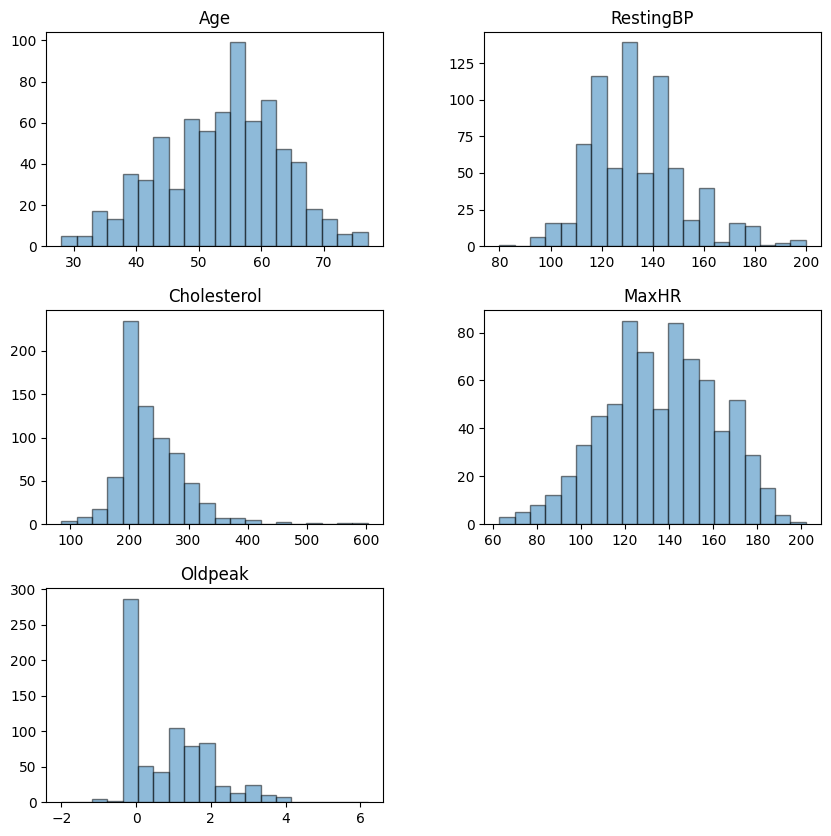

In [ ]:
# Histogram of numerical variables
data2[num_cols].hist(figsize=(10,10), bins=20, grid=False, edgecolor='black', alpha=0.5)

In [ ]:
# Check skewness of variables
data2[num_cols].skew().round(2)

Age           -0.20
RestingBP      0.65
Cholesterol    1.51
MaxHR         -0.14
Oldpeak        1.05
dtype: float64

Variables with high positive skewness:
* Cholesterol
* Oldpeak

Consider transforming the high skew variables with log.

In [ ]:
# Log transform Cholesterol and Oldpeak
data2['log_Cholesterol'] = np.log(data1['Cholesterol'])

# Add constant of 3 then log transform OldPeak
data2['log_Oldpeak'] = np.log(data1['Oldpeak'] + 3)

In [ ]:
# Skewness of log transformed variables
data2[['log_Cholesterol', 'log_Oldpeak']].skew().round(2)

log_Cholesterol    0.19
log_Oldpeak        0.36
dtype: float64

Log transformation of Cholesterol and Oldpeak has reduced the skewness value.

In [ ]:
# Skewness of all variables
data2.skew().round(2)

<ipython-input-51-7cd1161885c3>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data2.skew().round(2)


Age               -0.20
RestingBP          0.65
Cholesterol        1.51
FastingBS          1.26
MaxHR             -0.14
Oldpeak            1.05
HeartDisease      -0.21
log_Cholesterol    0.19
log_Oldpeak        0.36
dtype: float64

### Converting non-numerical data into numerical

In [ ]:
# Transform gender into dummy variables
dummy_gender = pd.get_dummies(data2['Gender'], prefix='Gender')

In [ ]:
dummy_gender.head()

Gender_F  Gender_M
0         0         1
1         0         1
2         0         1
3         0         1
4         0         1

In [ ]:
# Transform ChestPain into dummy variables
dummy_cp = pd.get_dummies(data2['ChestPainType'], prefix='ChestPain')
dummy_cp.head()

ChestPain_ASY  ChestPain_ATA  ChestPain_NAP  ChestPain_TA
0              0              1              0             0
1              1              0              0             0
2              0              0              1             0
3              1              0              0             0
4              0              1              0             0

In [ ]:
# Transform RestingECG into dummy variables
dummy_ecg = pd.get_dummies(data2['RestingECG'], prefix='RestingECG')
dummy_ecg.head()

RestingECG_LVH  RestingECG_Normal  RestingECG_ST
0               0                  1              0
1               0                  1              0
2               0                  0              1
3               1                  0              0
4               0                  1              0

In [ ]:
# Transform ExerciseAngina into a binary dummy variable
data2['dummy_ExAng'] = data2['ExerciseAngina'].map({'N':0, 'Y':1})
data2[['ExerciseAngina', 'dummy_ExAng']].head()

ExerciseAngina  dummy_ExAng
0              N            0
1              N            0
2              Y            1
3              Y            1
4              Y            1

In [ ]:
# Transform ST_Slope into dummy variables
dummy_slope = pd.get_dummies(data2['ST_Slope'], prefix='ST_Slope')
dummy_slope.head()

ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up
0              0              0            1
1              0              0            1
2              0              1            0
3              0              1            0
4              0              1            0

In [ ]:
# Concat dummy variables to data3
data3 = pd.concat([data2, dummy_cp, dummy_ecg, dummy_gender, dummy_slope], axis=1)
data3.head()

Id  Age Gender ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  PT1000   42      M           ATA      120.0        198.0          0   
1  PT1001   54      M           ASY      140.0        239.0          0   
2  PT1002   60      M           NAP      141.0        316.0          1   
3  PT1003   54      M           ASY      124.0        266.0          0   
4  PT1004   55      M           ATA      160.0        292.0          1   

  RestingECG  MaxHR ExerciseAngina  ...  ChestPain_NAP ChestPain_TA  \
0     Normal    155              N  ...              0            0   
1     Normal    160              N  ...              0            0   
2         ST    122              Y  ...              1            0   
3        LVH    109              Y  ...              0            0   
4     Normal    143              Y  ...              0            0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  Gender_F  Gender_M  \
0               0                  1              0         0         1   
1               0                  1              0         0         1   
2               0                  0              1         0         1   
3               1                  0              0         0         1   
4               0                  1              0         0         1   

   ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0              0              0            1  
1              0              0            1  
2              0              1            0  
3              0              1            0  
4              0              1            0  

[5 rows x 28 columns]

In [ ]:
# Drop original categorical variables & orginal num variables log trans
drop_list = ['Gender', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Cholesterol', 'Oldpeak']
data3.drop(drop_list, axis=1, inplace=True)

# Set data3 index to Id
data3.set_index('Id', inplace=True)


In [ ]:
data3.head()

Age  RestingBP  FastingBS  MaxHR  HeartDisease  log_Cholesterol  \
Id                                                                        
PT1000   42      120.0          0    155             0         5.288267   
PT1001   54      140.0          0    160             0         5.476464   
PT1002   60      141.0          1    122             1         5.755742   
PT1003   54      124.0          0    109             1         5.583496   
PT1004   55      160.0          1    143             1         5.676754   

        log_Oldpeak  dummy_ExAng  ChestPain_ASY  ChestPain_ATA  ChestPain_NAP  \
Id                                                                              
PT1000     1.098612            0              0              1              0   
PT1001     1.435085            0              1              0              0   
PT1002     1.547563            1              0              0              1   
PT1003     1.648659            1              1              0              0   
PT1004     1.609438            1              0              1              0   

        ChestPain_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
Id                                                                       
PT1000             0               0                  1              0   
PT1001             0               0                  1              0   
PT1002             0               0                  0              1   
PT1003             0               1                  0              0   
PT1004             0               0                  1              0   

        Gender_F  Gender_M  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
Id                                                                     
PT1000         0         1              0              0            1  
PT1001         0         1              0              0            1  
PT1002         0         1              0              1            0  
PT1003         0         1              0              1            0  
PT1004         0         1              0              1            0

### Scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# list of numerical variables
num_cols = ['Age', 'RestingBP', 'MaxHR', 'log_Cholesterol', 'log_Oldpeak']

# define standard scaler
scaler = StandardScaler()

# create a new dataframe to store the scaled data
scaled_data = pd.DataFrame(scaler.fit_transform(data3[num_cols]), columns=num_cols, index=data3.index)

# concatenate the scaled numerical data with the non-numerical columns in data3
data_scaled = pd.concat([scaled_data, data3.drop(num_cols, axis=1)], axis=1)

# print the scaled dataframe
data_scaled.head()

Age  RestingBP     MaxHR  log_Cholesterol  log_Oldpeak  \
Id                                                                    
PT1000 -1.218505  -0.723749  0.722367        -0.646708    -0.906345   
PT1001  0.041781   0.377939  0.916829         0.183581     0.420731   
PT1002  0.671923   0.433023 -0.561076         1.415708     0.864354   
PT1003  0.041781  -0.503411 -1.066675         0.655790     1.263086   
PT1004  0.146804   1.479627  0.255661         1.067226     1.108396   

        FastingBS  HeartDisease  dummy_ExAng  ChestPain_ASY  ChestPain_ATA  \
Id                                                                           
PT1000          0             0            0              0              1   
PT1001          0             0            0              1              0   
PT1002          1             1            1              0              0   
PT1003          0             1            1              1              0   
PT1004          1             1            1              0              1   

        ChestPain_NAP  ChestPain_TA  RestingECG_LVH  RestingECG_Normal  \
Id                                                                       
PT1000              0             0               0                  1   
PT1001              0             0               0                  1   
PT1002              1             0               0                  0   
PT1003              0             0               1                  0   
PT1004              0             0               0                  1   

        RestingECG_ST  Gender_F  Gender_M  ST_Slope_Down  ST_Slope_Flat  \
Id                                                                        
PT1000              0         0         1              0              0   
PT1001              0         0         1              0              0   
PT1002              1         0         1              0              1   
PT1003              0         0         1              0              1   
PT1004              0         0         1              0              1   

        ST_Slope_Up  
Id                   
PT1000            1  
PT1001            1  
PT1002            0  
PT1003            0  
PT1004            0

# Step 3 - Modelling

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

# Model libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
import os

In [ ]:
df = data_scaled
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

Age  RestingBP     MaxHR  log_Cholesterol  log_Oldpeak  FastingBS  \
0 -1.218505  -0.723749  0.722367        -0.646708    -0.906345          0   
1  0.041781   0.377939  0.916829         0.183581     0.420731          0   
2  0.671923   0.433023 -0.561076         1.415708     0.864354          1   
3  0.041781  -0.503411 -1.066675         0.655790     1.263086          0   
4  0.146804   1.479627  0.255661         1.067226     1.108396          1   

   HeartDisease  dummy_ExAng  ChestPain_ASY  ChestPain_ATA  ChestPain_NAP  \
0             0            0              0              1              0   
1             0            0              1              0              0   
2             1            1              0              0              1   
3             1            1              1              0              0   
4             1            1              0              1              0   

   ChestPain_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  Gender_F  \
0             0               0                  1              0         0   
1             0               0                  1              0         0   
2             0               0                  0              1         0   
3             0               1                  0              0         0   
4             0               0                  1              0         0   

   Gender_M  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0         1              0              0            1  
1         1              0              0            1  
2         1              0              1            0  
3         1              0              1            0  
4         1              0              1            0

## Classification Model

### Logistic Regression

In [ ]:
# Define x and y variables
df_x = df.drop(['HeartDisease'], axis=1)
df_y = df['HeartDisease']

# Split data into train and test sets
x_train, x_val, y_train, y_val = train_test_split(df_x, df_y, test_size=0.3, random_state=5)

In [ ]:
# Define model
log_reg = LogisticRegression()

# Fit model
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Class predictions
y_train_pred = log_reg.predict(x_train)
y_val_pred = log_reg.predict(x_val)

#### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

# Print accuracy
print("\n*** Logistic Regression - Model Evaluation***\n")
error_train = accuracy_score(y_train, y_train_pred)
print('Training accuracy: ', error_train.round(2))

error_val = accuracy_score(y_val, y_val_pred)
print('Validation accuracy: ', error_val.round(2))


*** Logistic Regression - Model Evaluation***

Training accuracy:  0.85
Validation accuracy:  0.86


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_val_pred)

array([[ 90,  15],
       [ 15, 101]])

In [ ]:
# Classification report
from sklearn.metrics import classification_report

report_train = classification_report(y_train, y_train_pred)
print("*** Training report ***\n", report_train, end='\n\n')

report_val = classification_report(y_val, y_val_pred)
print("*** Validation report ***\n", report_val)

*** Training report ***
               precision    recall  f1-score   support

           0       0.85      0.80      0.83       223
           1       0.85      0.89      0.87       290

    accuracy                           0.85       513
   macro avg       0.85      0.85      0.85       513
weighted avg       0.85      0.85      0.85       513


*** Validation report ***
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.87      0.87      0.87       116

    accuracy                           0.86       221
   macro avg       0.86      0.86      0.86       221
weighted avg       0.86      0.86      0.86       221



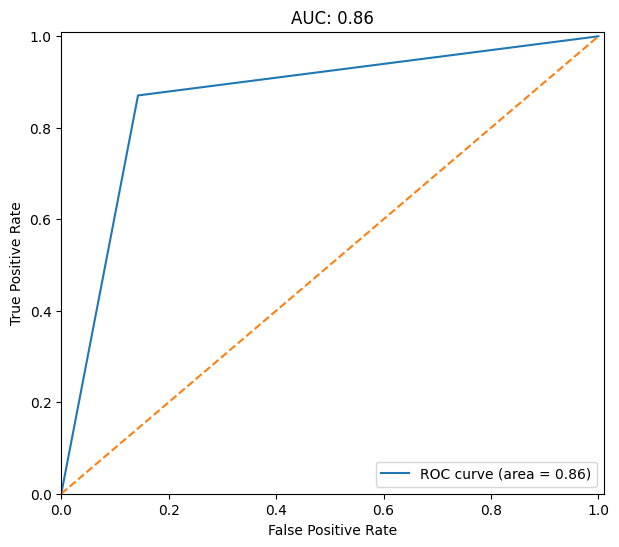

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

auc = roc_auc_score(y_val, y_val_pred)
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred, pos_label=1)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC: {:.2f}'.format(auc))
plt.legend(loc="lower right")

# Set size
fig = plt.gcf()
fig.set_size_inches(7, 6)

plt.show()

### k-Fold cross validation

In [ ]:
from sklearn import model_selection

In [ ]:
k = 10
random_state = 2
kfold = model_selection.KFold(n_splits=k, random_state=random_state, shuffle=True)
model = LogisticRegression()

In [ ]:
# Set the scoring metric to accuracy
scoring = 'accuracy'

# Perform k-fold cross validation
results = model_selection.cross_val_score(model, df_x, df_y, cv=kfold, scoring=scoring)

# Print the mean and standard deviation of the accuracy scores
print("Accuracy: {:.2f} ({:.2f})".format(results.mean(), results.std()))

Accuracy: 0.85 (0.03)


k-fold x-val doesn't improve the accuracy.

## Ensemble Models

### Gradient Boost Model

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

#import sklearn
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV  #Performing grid search

import matplotlib.pylab as plt
#%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

# Define x and y variables
df_x = df.drop(['HeartDisease'], axis=1)
df_y = df['HeartDisease']

# Split data into train and test sets
x_train, x_val, y_train, y_val = train_test_split(df_x, df_y, test_size=0.2, random_state=5)

# train = pd.concat([x_train, y_train], axis=1)
# target = 'HeartDisease'
# IDcol = 'Id'

In [ ]:
x_train.head()

Age  RestingBP     MaxHR  log_Cholesterol  log_Oldpeak  FastingBS  \
49  -0.588362  -1.494930 -1.027783         0.605750    -0.906345          1   
300  0.461876  -0.393242 -1.027783        -0.639155     1.108396          1   
689  2.142256  -0.723749 -0.599968         0.705269    -0.651799          0   
641  1.722161  -0.999170 -1.727843        -0.639155    -0.906345          0   
664  0.146804   0.928783  0.527906        -1.586836    -0.906345          0   

     dummy_ExAng  ChestPain_ASY  ChestPain_ATA  ChestPain_NAP  ChestPain_TA  \
49             0              1              0              0             0   
300            1              0              1              0             0   
689            1              0              1              0             0   
641            1              1              0              0             0   
664            0              1              0              0             0   

     RestingECG_LVH  RestingECG_Normal  RestingECG_ST  Gender_F  Gender_M  \
49                0                  1              0         0         1   
300               0                  1              0         0         1   
689               1                  0              0         1         0   
641               0                  0              1         0         1   
664               0                  0              1         0         1   

     ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
49               0              1            0  
300              0              1            0  
689              0              0            1  
641              0              1            0  
664              0              0            1

In [ ]:
def modelfit(alg, target=y_train, predictors=x_train, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(predictors, target)

    #Predict training set:
    dtrain_predictions = alg.predict(predictors)
    dtrain_predprob = alg.predict_proba(predictors)[:,1]

    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, predictors, target, cv=cv_folds, scoring='roc_auc')

    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(y_train.values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(y_train, dtrain_predprob))

    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

#### Create a baseline model

In [ ]:
# Create a baseline model

# # Choose all predictors except target & IDcols
# predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=5)
modelfit(gbm0, y_train, x_train)


Model Report
Accuracy : 0.9523
AUC Score (Train): 0.990704
CV Score : Mean - 0.9115084 | Std - 0.02681278 | Min - 0.8609579 | Max - 0.9399408


In [ ]:
# Class predictions
y_train_pred = gbm0.predict(x_train)
y_val_pred = gbm0.predict(x_val)
print('\n*** GBM - Baseline Model - Accuracy ***\n')

# Print accuracy
error_train = accuracy_score(y_train, y_train_pred)
print('Training accuracy: ', error_train.round(2))

error_val = accuracy_score(y_val, y_val_pred)
print('Validation accuracy: ', error_val.round(2))


*** GBM - Baseline Model - Accuracy ***

Training accuracy:  0.95
Validation accuracy:  0.89


#### Tune n_estimators to learning rate 0.1

Tuning the learning rate to find the optimal n_estimators.

Set initial values for parameters. These will be tuned later.
1. min_samples_split
2. min_samples_leaf
3. max_depth
4. max_featues
5. subsample

In [ ]:
param_test1 = {'n_estimators':range(20,81,10)} # Set up param test to find the best n_estimators

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(
    # Fixed learning and tree based parameters to determine best n_estimators for learning rate. Learning rate of 0.1 is good start.
    learning_rate = 0.12, min_samples_split = 20, min_samples_leaf = 20, max_depth = 5, max_features = 'sqrt', subsample = 0.8, random_state = 5),
    # Determine the best n_estimators
param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.12,
                                                  max_depth=5,
                                                  max_features='sqrt',
                                                  min_samples_leaf=20,
                                                  min_samples_split=20,
                                                  random_state=5,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='roc_auc')

In [ ]:
gsearch1.score, gsearch1.best_params_, gsearch1.best_score_

(<bound method BaseSearchCV.score of GridSearchCV(cv=5,
              estimator=GradientBoostingClassifier(learning_rate=0.12,
                                                   max_depth=5,
                                                   max_features='sqrt',
                                                   min_samples_leaf=20,
                                                   min_samples_split=20,
                                                   random_state=5,
                                                   subsample=0.8),
              n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
              scoring='roc_auc')>,
 {'n_estimators': 80},
 0.921752159306586)

For learning rate of 0.1, optimal estimators in this model is 60. This number is good.

n_estimators is a boosting parameter = number of sequential trees to be modelled.

Notes:

* If value is around 20, you might want to lower the learning rate to 0.05 and re-run the grid search (Jain, 2016)
* If the values are too high, around ~100, try a higher learning rate (i.e., 0.2) because tuning the other parameters will take a long time (clarify this statement) (Jain, 2016)

#### Tuning tree-specific parameters

1. Tune max_depth and num_samples_split
1. Tune min_samples_leaf
1. Tune max_features

**Order of tuning** variables should be decided carefully.

Tune variables will higher impact first. max_depth and min_samples_split have greater impact, therefore tune first.


In [ ]:
# set up param test to find the best max_depth and min_samples_split
param_test2 = {'max_depth': range(5, 16), 'min_samples_split': range(200, 1001, 200)}

# initialise GridSearchCV to search for best hyperparameters
gsearch2 = GridSearchCV(
    estimator=GradientBoostingClassifier(
        learning_rate=0.12,
        n_estimators=60,
        max_features='sqrt',
        subsample=0.8,
        random_state=5
    ),
    param_grid=param_test2, # search over the hyperparameter grid for max_depth and min_samples_split
    scoring='roc_auc', # use ROC AUC as evaluation metric
    n_jobs=4, # use 4 CPU cores
    cv=5 # perform 5-fold cross-validation
)

# fit the GridSearchCV object to the training data
gsearch2.fit(x_train, y_train)

# print the results
print(gsearch2.score) # print a summary of the search
print(gsearch2.best_params_) # print the hyperparameters that resulted in the best score
print(gsearch2.best_score_) # print the best mean cross-validated score achieved during the search

<bound method BaseSearchCV.score of GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.12,
                                                  max_features='sqrt',
                                                  n_estimators=60,
                                                  random_state=5,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(5, 16),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='roc_auc')>
{'max_depth': 6, 'min_samples_split': 200}
0.912556625764173


In [ ]:
modelfit(gsearch2.best_estimator_, y_train, x_train)


Model Report
Accuracy : 0.8961
AUC Score (Train): 0.958230
CV Score : Mean - 0.9125566 | Std - 0.02379893 | Min - 0.8714078 | Max - 0.941716


#### Tune max_features

In [ ]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.12,
                                                               n_estimators=60,
                                                               max_depth=6,
                                                               min_samples_split=200,
                                                               min_samples_leaf=50,
                                                               subsample=0.8,
                                                               random_state=5),
param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(x_train, y_train)
gsearch4.score, gsearch4.best_params_, gsearch4.best_score_


(<bound method BaseSearchCV.score of GridSearchCV(cv=5,
              estimator=GradientBoostingClassifier(learning_rate=0.12,
                                                   max_depth=6,
                                                   min_samples_leaf=50,
                                                   min_samples_split=200,
                                                   n_estimators=60,
                                                   random_state=5,
                                                   subsample=0.8),
              n_jobs=4, param_grid={'max_features': range(7, 20, 2)},
              scoring='roc_auc')>,
 {'max_features': 15},
 0.9148511744665591)

#### Tune subsample

In [ ]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.12,
                                                               n_estimators=60,
                                                               max_depth=6,
                                                               min_samples_split=200,
                                                               min_samples_leaf=50,
                                                               random_state=5,
                                                               max_features=15),
param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(x_train, y_train)
gsearch5.score, gsearch5.best_params_, gsearch5.best_score_

(<bound method BaseSearchCV.score of GridSearchCV(cv=5,
              estimator=GradientBoostingClassifier(learning_rate=0.12,
                                                   max_depth=6, max_features=15,
                                                   min_samples_leaf=50,
                                                   min_samples_split=200,
                                                   n_estimators=60,
                                                   random_state=5),
              n_jobs=4,
              param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
              scoring='roc_auc')>,
 {'subsample': 0.8},
 0.9148511744665591)

Grid search test with the above variables has determined that 0.9 is the best subsample.

#### Tuned Model 1 - GBM

In [ ]:
# Define the GradientBoostingClassifier with the desired hyperparameters
gbm_tuned_1 = GradientBoostingClassifier(
    learning_rate=0.12,
    n_estimators=60,
    max_depth=5,
    min_samples_split=200,
    min_samples_leaf=50,
    random_state=5,
    max_features=15,
    subsample=0.8
)

# Fit the model to the training data using the defined predictors
modelfit(gbm_tuned_1, y_train, x_train)


Model Report
Accuracy : 0.8859
AUC Score (Train): 0.952213
CV Score : Mean - 0.9148512 | Std - 0.02429277 | Min - 0.8769231 | Max - 0.9511834


In [ ]:
# Class predictions
y_train_pred = gbm_tuned_1.predict(x_train)
y_val_pred = gbm_tuned_1.predict(x_val)

print('\n*** GBM - Tuned Model 1 - Accuracy ***\n')

# Print accuracy
error_train = accuracy_score(y_train, y_train_pred)
print('Training accuracy: ', error_train.round(2))

error_val = accuracy_score(y_val, y_val_pred)
print('Validation accuracy: ', error_val.round(2))


*** GBM - Tuned Model 1 - Accuracy ***

Training accuracy:  0.89
Validation accuracy:  0.88


In [ ]:
# use the get_params() method to get a dictionary of hyperparameters and their values
params = gbm_tuned_1.get_params()

# print the hyperparameters and their values
for param_name in sorted(params.keys()):
    print("%s: %r" % (param_name, params[param_name]))

ccp_alpha: 0.0
criterion: 'friedman_mse'
init: None
learning_rate: 0.12
loss: 'log_loss'
max_depth: 5
max_features: 15
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 50
min_samples_split: 200
min_weight_fraction_leaf: 0.0
n_estimators: 60
n_iter_no_change: None
random_state: 5
subsample: 0.8
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False


#### Tuned Model 2 - GBM

In [ ]:
# Define the GradientBoostingClassifier with the desired hyperparameters
gbm_tuned_2 = GradientBoostingClassifier(
    learning_rate=0.06,
    n_estimators=120,
    max_depth=5,
    min_samples_split=200,
    min_samples_leaf=50,
    random_state=5,
    max_features=15,
    subsample=0.8
)

# Fit the model to the training data
modelfit(gbm_tuned_2, y_train, x_train)
print("\nHyperparameters:\n")
# print the hyperparameters and their values
for param_name in sorted(params.keys()):
    print("%s: %r" % (param_name, params[param_name]))


Model Report
Accuracy : 0.8978
AUC Score (Train): 0.953858
CV Score : Mean - 0.9135986 | Std - 0.02203293 | Min - 0.8830189 | Max - 0.9491124

Hyperparameters:

ccp_alpha: 0.0
criterion: 'friedman_mse'
init: None
learning_rate: 0.12
loss: 'log_loss'
max_depth: 5
max_features: 15
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 50
min_samples_split: 200
min_weight_fraction_leaf: 0.0
n_estimators: 60
n_iter_no_change: None
random_state: 5
subsample: 0.8
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False


In [ ]:
# Class predictions
y_train_pred = gbm_tuned_2.predict(x_train)
y_val_pred = gbm_tuned_2.predict(x_val)

print('\n*** GBM - Tuned Model 2 - Accuracy ***\n')

# Print accuracy
error_train = accuracy_score(y_train, y_train_pred)
print('Training accuracy: ', error_train.round(2))

error_val = accuracy_score(y_val, y_val_pred)
print('Validation accuracy: ', error_val.round(2))


*** GBM - Tuned Model 2 - Accuracy ***

Training accuracy:  0.9
Validation accuracy:  0.89


#### Tuned Model 3 - GBM

In [ ]:
# Define the GradientBoostingClassifier with the desired hyperparameters
gbm_tuned_3 = GradientBoostingClassifier(
    learning_rate=0.03,
    n_estimators=240,
    max_depth=5,
    min_samples_split=200,
    min_samples_leaf=50,
    random_state=5,
    max_features=15,
    subsample=0.8,
    # warm_start=True
)

# Fit the model to the training data
modelfit(gbm_tuned_3, y_train, x_train)


Model Report
Accuracy : 0.9029
AUC Score (Train): 0.954752
CV Score : Mean - 0.914236 | Std - 0.02099788 | Min - 0.88418 | Max - 0.947929


In [ ]:
# Class predictions
y_train_pred = gbm_tuned_3.predict(x_train)
y_val_pred = gbm_tuned_3.predict(x_val)

print('\n*** GBM - Tuned Model 3 - Accuracy ***\n')

# Print accuracy
error_train = accuracy_score(y_train, y_train_pred)
print('Training accuracy: ', error_train.round(2))

error_val = accuracy_score(y_val, y_val_pred)
print('Validation accuracy: ', error_val.round(2))


*** GBM - Tuned Model 3 - Accuracy ***

Training accuracy:  0.9
Validation accuracy:  0.88


#### Tuned Model 4 - GBM

In [ ]:
# Define the GradientBoostingClassifier with the desired hyperparameters
gbm_tuned_4 = GradientBoostingClassifier(
    learning_rate=0.01,
    n_estimators=500,
    max_depth=5,
    min_samples_split=200,
    min_samples_leaf=50,
    random_state=5,
    max_features=15,
    subsample=0.8,
    warm_start=True,
    verbose=0
)

# Fit the model to the training data
modelfit(gbm_tuned_4, y_train, x_train)


Model Report
Accuracy : 0.8807
AUC Score (Train): 0.945996
CV Score : Mean - 0.9115474 | Std - 0.02367642 | Min - 0.875762 | Max - 0.9491124


In [ ]:
# Class predictions
y_train_pred = gbm_tuned_4.predict(x_train)
y_val_pred = gbm_tuned_4.predict(x_val)

print('\n*** GBM - Tuned Model 4 - Accuracy ***\n')

# Print accuracy
error_train = accuracy_score(y_train, y_train_pred)
print('Training accuracy: ', error_train.round(2))

error_val = accuracy_score(y_val, y_val_pred)
print('Validation accuracy: ', error_val.round(2))


*** GBM - Tuned Model 4 - Accuracy ***

Training accuracy:  0.88
Validation accuracy:  0.88


### Selected Model - Gradient Boost Model

In [ ]:
gbm_selected = gbm_tuned_2

In [ ]:
# Class predictions
y_train_pred = gbm_tuned_2.predict(x_train)
y_val_pred = gbm_tuned_2.predict(x_val)

In [ ]:
# Validation set Confusion Matrix
from sklearn.metrics import confusion_matrix

print('Validation set Confusion Matrix:\n', confusion_matrix(y_val, y_val_pred))

Validation set Confusion Matrix:
 [[60  7]
 [ 9 71]]


In [ ]:
# F1 score
from sklearn.metrics import f1_score

# Calculate f1 score trainig and validation sets
f1_train = f1_score(y_train, y_train_pred)
f1_val = f1_score(y_val, y_val_pred)

# Print
print('F1 score (training): {:.2f}'.format(f1_train))
print('F1 score (val): {:.2f}'.format(f1_val))

F1 score (training): 0.91
F1 score (val): 0.90


In [ ]:
from sklearn.metrics import classification_report

report_train = classification_report(y_train_pred, y_train)
print('\n*** Selected GBM - Training Report ***\n', report_train, end="\n\n")

report_val = classification_report(y_val_pred, y_val)
print('*** Selected GBM - Validation Report ***\n', report_val)


*** Selected GBM - Training Report ***
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       243
           1       0.94      0.89      0.91       344

    accuracy                           0.90       587
   macro avg       0.89      0.90      0.90       587
weighted avg       0.90      0.90      0.90       587


*** Selected GBM - Validation Report ***
               precision    recall  f1-score   support

           0       0.90      0.87      0.88        69
           1       0.89      0.91      0.90        78

    accuracy                           0.89       147
   macro avg       0.89      0.89      0.89       147
weighted avg       0.89      0.89      0.89       147



Both the training and validation sets have similar and high F1 scores (0.91 for training data, 0.90 for validation data), indicating relatively low bias and variance. Low bias demonstrates that the model has sufficient data to learn from, and there is relatively high accuracy. Low variance indicates that the model is not overfitted, which means that the model has generalised patterns well across the whole dataset and will predict well on unseen data.

### Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# Create a neural network classifier with 1 hidden layers of 1000 neurons, respectively
clf = MLPClassifier(hidden_layer_sizes=(500), activation='relu', solver='adam', max_iter=1000, random_state=5, learning_rate_init=0.005)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Use the trained classifier to make predictions on the test data
y_pred = clf.predict(x_val)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy (Validation set):", accuracy.round(2))

Accuracy (Validation set): 0.84


# Step X - Compare Models

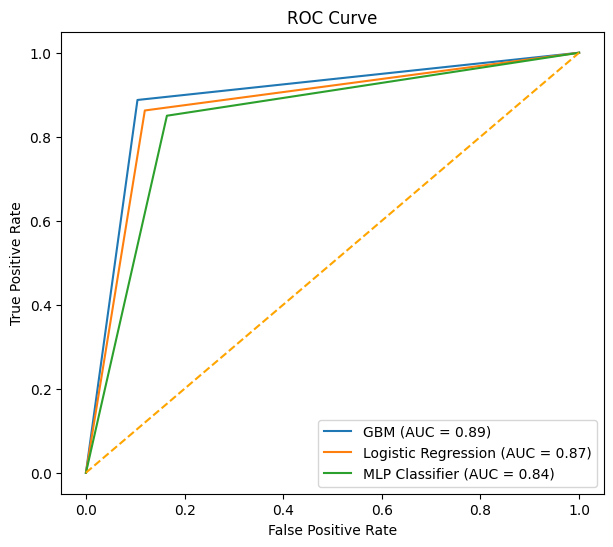

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for both models on the validation set
y_pred_gbm = gbm_selected.predict(x_val)
y_pred_logreg = log_reg.predict(x_val)
y_pred_clf = clf.predict(x_val)

# Compute ROC curve and AUC score for both models
fpr_gbm, tpr_gbm, _ = roc_curve(y_val, y_pred_gbm)
auc_gbm = roc_auc_score(y_val, y_pred_gbm)

fpr_logreg, tpr_logreg, _ = roc_curve(y_val, y_pred_logreg)
auc_logreg = roc_auc_score(y_val, y_pred_logreg)

fpr_clf, tpr_clf, _ = roc_curve(y_val, y_pred_clf)
auc_clf = roc_auc_score(y_val, y_pred_clf)

# Plot ROC curve for both models
plt.plot(fpr_gbm, tpr_gbm, label='GBM (AUC = {:.2f})'.format(auc_gbm))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = {:.2f})'.format(auc_logreg))
plt.plot(fpr_clf, tpr_clf, label='MLP Classifier (AUC = {:.2f})'.format(auc_clf))

# Plot baseline
plt.plot([0, 1], [0, 1], '--', color="orange")

# Add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Set size
fig = plt.gcf()
fig.set_size_inches(7, 6)

# Show the plot
plt.show()


# XAI - SHAP Explainer

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 30.2 MB/s eta 0:00:00


In [ ]:
import shap
import pandas as pd

# Define data
X = x_train
y = y_train

# Select a model
model = gbm_selected

# Create an explainer object
explainer = shap.TreeExplainer(model, X)

# Compute SHAP values for the first instances
shap_values = explainer(X)

In [ ]:
# create a variable for record_id
record_id = 60

# print the actual values for the record
print('Actual values for record_id', record_id, ':\n', X.iloc[record_id].round(2), end="\n\n")

# print the actual class for the record
print('Actual class for record_id', record_id, ':\n', int(y_train.iloc[record_id]), end="\n\n")

Actual values for record_id 60 :
 Age                  1.72
RestingBP            0.38
MaxHR                0.80
log_Cholesterol     -0.64
log_Oldpeak          1.11
FastingBS            1.00
dummy_ExAng          1.00
ChestPain_ASY        1.00
ChestPain_ATA        0.00
ChestPain_NAP        0.00
ChestPain_TA         0.00
RestingECG_LVH       0.00
RestingECG_Normal    1.00
RestingECG_ST        0.00
Gender_F             0.00
Gender_M             1.00
ST_Slope_Down        0.00
ST_Slope_Flat        1.00
ST_Slope_Up          0.00
Name: 230, dtype: float64

Actual class for record_id 60 :
 1



In [ ]:
x_train.columns

Index(['Age', 'RestingBP', 'MaxHR', 'log_Cholesterol', 'log_Oldpeak',
       'FastingBS', 'dummy_ExAng', 'ChestPain_ASY', 'ChestPain_ATA',
       'ChestPain_NAP', 'ChestPain_TA', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST', 'Gender_F', 'Gender_M', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
# visualise the record's explanation
shap.initjs()
shap.plots.force(shap_values[record_id])

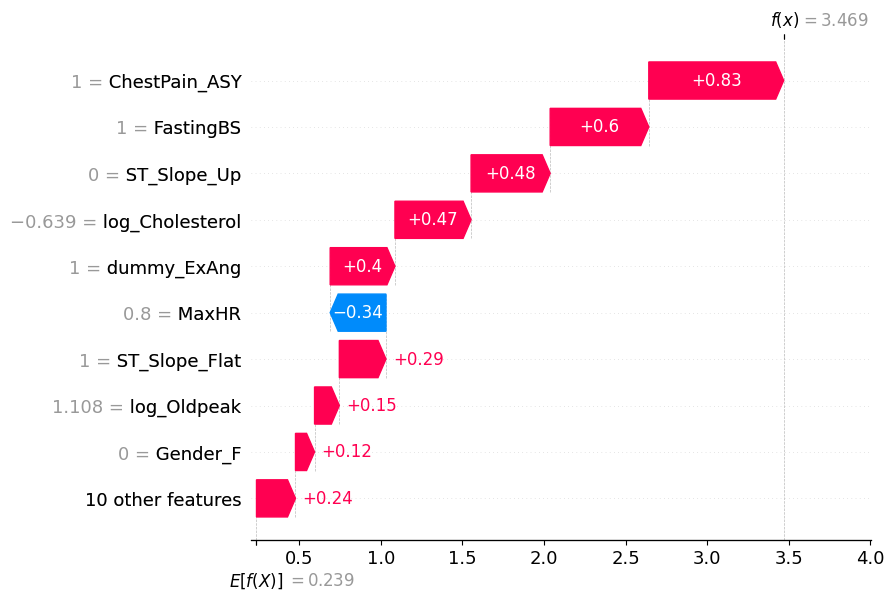

In [ ]:
shap.plots.waterfall(shap_values[record_id])

In [ ]:
shap.initjs()
shap.plots.force(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


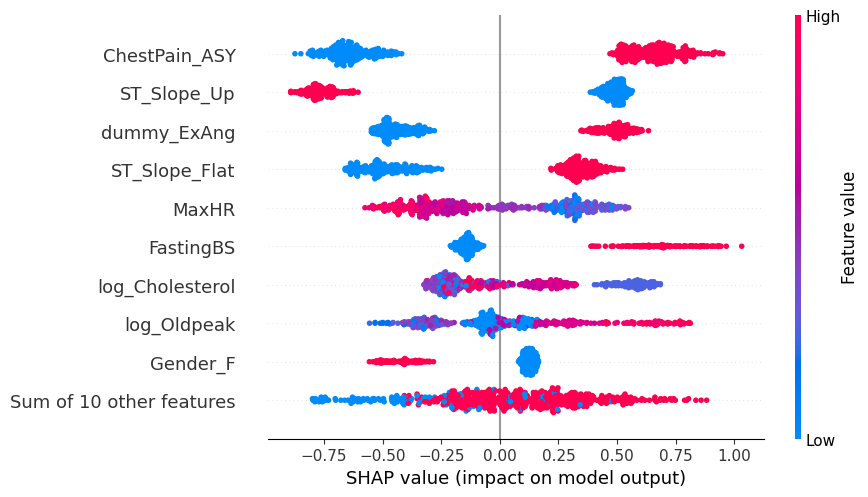

In [ ]:
# Bee swarm plot
shap.initjs()
shap.plots.beeswarm(shap_values)

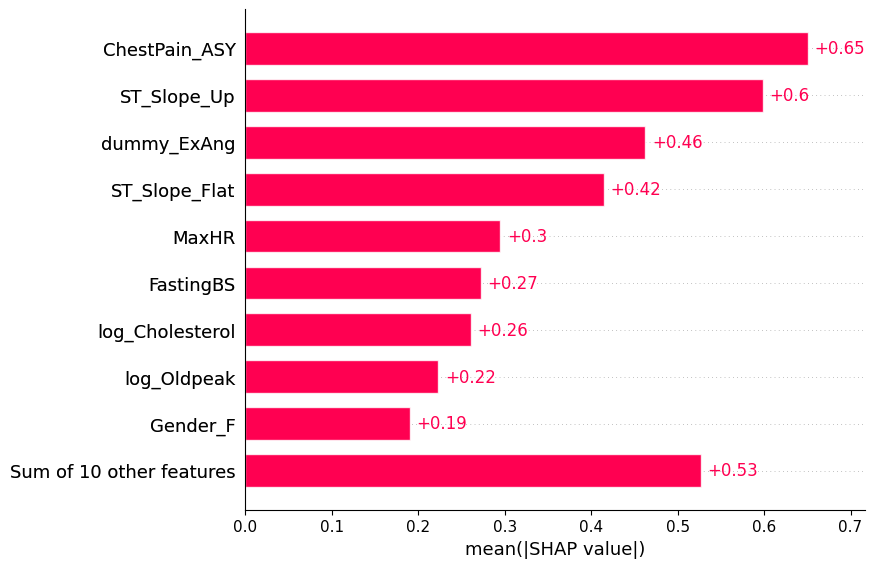

In [ ]:
# Bar plot
shap.initjs()
shap.plots.bar(shap_values)

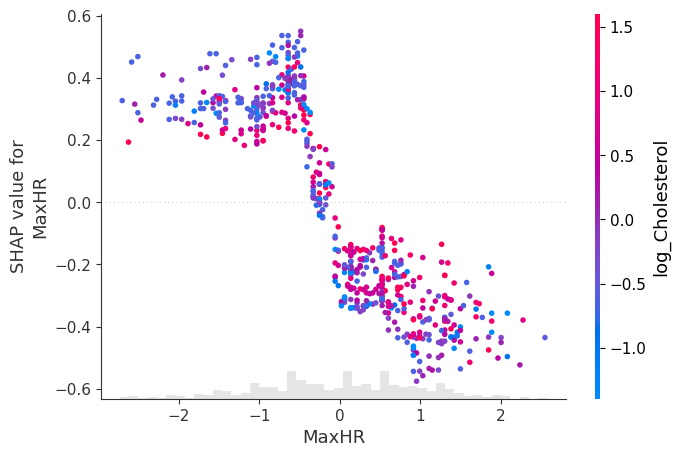

In [ ]:
# Scatter plot - MaxHR vs log_Cholesterol
shap.plots.scatter(shap_values[:, "MaxHR"], color=shap_values[:, "log_Cholesterol"])